The processed dataset:  [[  4.00000000e-01   6.00000000e-01   0.00000000e+00 ...,   0.00000000e+00
    1.80790960e-01   0.00000000e+00]
 [  0.00000000e+00   2.00000000e-01   1.00000000e-01 ...,   4.00000000e+00
    2.41228070e-01   0.00000000e+00]
 [ -5.00000000e-01   0.00000000e+00   0.00000000e+00 ...,   6.00000000e+00
    2.11981567e-01   0.00000000e+00]
 ..., 
 [ -1.00000000e-01   5.00000000e-01   0.00000000e+00 ...,   3.00000000e+00
    3.95683453e-01   4.91100000e+04]
 [  1.00000000e-01   3.00000000e-01   1.00000000e-01 ...,   4.00000000e+00
    4.72222222e-01   5.07740000e+04]
 [ -1.00000000e-01   7.00000000e-01   5.00000000e-01 ...,   7.00000000e+00
    2.96943231e-01   6.23570000e+04]]
Results:
Coefficients: 
 [[ -3.08299107e+01  -7.06741132e+01   1.52552739e+02  -3.69627990e+02
   -2.72644865e+02   3.23729288e+02   1.56363415e+02  -4.19499681e+02
    2.03916871e+02   1.00842087e+02   4.54784555e+01   8.62479733e+01
   -6.73691989e+01  -3.28275099e+01  -1.24236833e+02  -5.6152

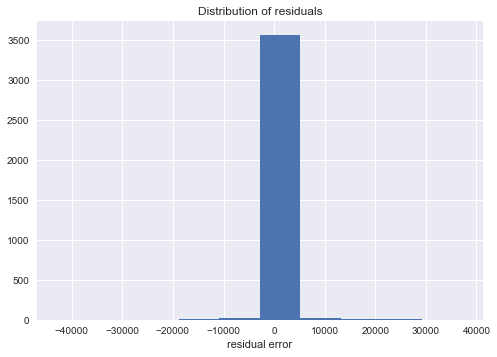

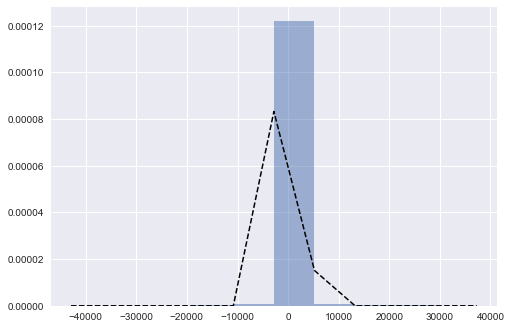

MSE of every fold with K=10:  [ 8930172.34089888  2259865.27618574  9708448.89360435  4683846.81636235
  7933106.1475941   5882986.65750111  2543249.09661952  9232521.0121657
  5095649.3904735   7604565.46545413]
Mean of 10-fold cross-validated MSE: 6387441.11 (+/- 5141970.62)
Depth: 1 Accuracy: 0.064
Depth: 2 Accuracy: 0.067
Depth: 3 Accuracy: 0.071
Depth: 4 Accuracy: 0.068
Depth: 5 Accuracy: 0.066
Depth: 6 Accuracy: 0.068
Depth: 7 Accuracy: 0.059
Depth: 8 Accuracy: 0.059
Depth: 9 Accuracy: 0.053


DecisionTreeRegressor with max_depth = 1
MSE of every fold with K=10:  [ 5974554.09304665  2971127.83026218  3396001.65686631  4298867.94964624
  9433379.04140206  6963868.76400453  2968948.020363    4978219.97868542
  2962143.89327354  3835694.56950946]
Mean of 10-fold cross-validated MSE: 4778280.58 (+/- 4039040.54)
Results:
Mean residual sum of squares = 4226509.90
R2 = 0.65
Mean of residuals = -7.31022429055e-14
Standard deviation of residuals = 2055.84773323


DecisionTreeRegressor wit

AttributeError: Unknown property xlabel

In [75]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import pylab as P
import numpy as np

#model packages
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#from sklearn.cross_validation import cross_val_score, cross_val_predic

#evaluate packages
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#validation curve
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

# learning curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

dataset = pd.read_csv('popularitybot_datamodel_reduceclass_hours.csv')
dataset.isnull().any()
dataset.head()
dataset.describe()


#pre-processing features
language_content_score= dataset.language_content_score.values.reshape((len(dataset.language_content_score), 1))
language_content_magnitude  = dataset.language_content_magnitude.values.reshape((len(dataset.language_content_magnitude), 1))
language_title_score  = dataset.language_title_score.values.reshape((len(dataset.language_title_score), 1))
language_title_magnitude  = dataset.language_title_magnitude.values.reshape((len(dataset.language_title_magnitude), 1))
post_domain = dataset.post_domain.values.reshape((len(dataset.post_domain), 1))
post_gilded  = dataset.post_gilded.values.reshape((len(dataset.post_gilded), 1))
post_hide_score =  dataset.post_hide_score.values.reshape((len(dataset.post_hide_score), 1))
post_subreddit =  dataset.post_subreddit.values.reshape((len(dataset.post_subreddit), 1))
post_is_reddit_media_domain =  dataset.post_is_reddit_media_domain.values.reshape((len(dataset.post_is_reddit_media_domain), 1))
post_num_comments =  dataset.post_num_comments.values.reshape((len(dataset.post_num_comments), 1))
post_num_crossposts =  dataset.post_num_crossposts.values.reshape((len(dataset.post_num_crossposts), 1))
post_over_18 =  dataset.post_over_18.values.reshape((len(dataset.post_over_18), 1))
user_comment_karma =  dataset.user_comment_karma.values.reshape((len(dataset.user_comment_karma), 1))
user_is_gold =  dataset.user_is_gold.values.reshape((len(dataset.user_is_gold), 1))
user_is_mod =  dataset.user_is_mod.values.reshape((len(dataset.user_is_mod), 1))
user_link_karma =  dataset.user_link_karma.values.reshape((len(dataset.user_link_karma), 1))
user_verified =  dataset.user_verified.values.reshape((len(dataset.user_verified), 1))
vision_blue =  dataset.vision_blue.values.reshape((len(dataset.vision_blue), 1))
vision_green =  dataset.vision_green.values.reshape((len(dataset.vision_green), 1))
vision_red =  dataset.vision_red.values.reshape((len(dataset.vision_red), 1))
post_age =  dataset.post_age.values.reshape((len(dataset.post_age), 1))
post_prop =  dataset.post_prop.values.reshape((len(dataset.post_prop), 1))



#hot encode categorical variable
enc = preprocessing.OneHotEncoder()
enc.fit(post_domain)
transformed_post_domain  = enc.transform(post_domain).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_gilded)
transformed_post_gilded  = enc.transform(post_gilded).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_hide_score)
transformed_post_hide_score = enc.transform(post_hide_score).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_subreddit)
transformed_post_subreddit = enc.transform(post_subreddit).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_is_reddit_media_domain)
transformed_post_is_reddit_media_domain = enc.transform(post_is_reddit_media_domain).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_over_18)
transformed_post_over_18 = enc.transform(post_over_18).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_is_gold)
transformed_user_is_gold= enc.transform(user_is_gold).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_is_mod)
transformed_user_is_mod = enc.transform(user_is_mod).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_verified)
transformed_user_verified  = enc.transform(user_verified).toarray()


# prepare datasets to be fed in the regression model
#predict post_score given all other EV
CV =  dataset.post_score.values.reshape((len(dataset.post_score), 1))
CV_transformed = np.concatenate((CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV,CV), axis=1)
data = np.concatenate((language_content_score,language_content_magnitude,language_title_score,language_title_magnitude,transformed_post_domain,transformed_post_gilded,transformed_post_hide_score,transformed_post_subreddit,transformed_post_is_reddit_media_domain,post_num_comments,post_num_crossposts,transformed_post_over_18,user_comment_karma,transformed_user_is_gold,transformed_user_is_mod,user_link_karma,transformed_user_verified,vision_blue,vision_green,vision_red,post_age,post_prop), axis=1)
print("The processed dataset: ", np.concatenate((data, CV), axis=1))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data, CV)

# get the predictions on the training data
predicted_results = regr.predict(data)

print("Results:")
# The coefficients (mis, b) of y = misxis + b
print('Coefficients: \n', regr.coef_)
print('Intercept (b): \n', regr.intercept_)

print("Mean residual sum of squares = %.2f"
      % np.mean((regr.predict(data) - CV) ** 2))
print('R2 = %.2f' % regr.score(data,CV))


# to see how the residual errors behave
residual_error = CV - predicted_results
print("Mean of residuals =", np.mean(residual_error))
print("Standard deviation of residuals =", np.std(residual_error))


# distribution of residuals
plt.figure(6)
plt.hist(residual_error)
plt.title("Distribution of residuals")
plt.xlabel("residual error")
plt.show()

# distribution of residuals with normal distribution
plt.figure(7)
n, bins, patches = plt.hist(residual_error, 10, normed=1,  alpha = 0.5)
y_pdf = P.normpdf(bins, np.mean(residual_error), np.std(residual_error))
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.show()

# set up k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# calculating 10 fold cross validation results
model = linear_model.LinearRegression()
scores = cross_val_score(model, data, CV, scoring='neg_mean_squared_error', cv=kf)
print("MSE of every fold with K=10: ", abs(scores))
print("Mean of 10-fold cross-validated MSE: %0.2f (+/- %0.2f)" % (abs(scores.mean()), scores.std() * 2))

tree_depth = []
r2_tree_at_depth = []


for depth in range(1,10):
    tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_classifier.fit(data,CV).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, data, CV,
                                    scoring='accuracy', cv=kf, n_jobs=1))
    print('Depth: %i Accuracy: %.3f' % (depth,score))


for i in range(1,12):
    regression_tree = DecisionTreeRegressor(random_state=24, max_depth=i)
    dtr = cross_val_score(regression_tree, data, CV_transformed, scoring='neg_mean_squared_error', cv=kf, n_jobs=1)
    print("\n\nDecisionTreeRegressor with max_depth = {0}".format(i))
    print("MSE of every fold with K=10: ", abs(dtr))
    print("Mean of 10-fold cross-validated MSE: %0.2f (+/- %0.2f)" % (abs(dtr.mean()), dtr.std() * 2))
        
    regression_tree.fit(data, CV_transformed)
    y_1 = regression_tree.predict(data)
    
    print("Results:")
    print("Mean residual sum of squares = %.2f"
          % np.mean((y_1 - CV_transformed) ** 2))
    R2_tree = regression_tree.score(data, CV_transformed)
    print('R2 = %.2f' % R2_tree)

    # plt.figure()
    # plt.scatter(data, CV_transformed, c="k", label="training samples")
    # plt.plot(data, y_1, c="g", linewidth=2)
    # plt.xlabel("Data")
    # plt.ylabel("Score")
    # plt.title("Decision Tree Regression")
    # plt.legend()
    # plt.show()
    
    # to see how the residual errors behave
    residual_error = CV - y_1
    print("Mean of residuals =", np.mean(residual_error))
    print("Standard deviation of residuals =", np.std(residual_error))
    
    tree_depth.append(i)
    r2_tree_at_depth.append(R2_tree)

plt.figure()
plt.plot(tree_depth, r2_tree_at_depth, c="g", linewidth=2)
plt.xlabel("Tree depth")
plt.ylabel("R2")
plt.title("Decision Tree Regression - R2 at Tree Depth")
plt.legend()
plt.show()
    
